In [1]:
using Distributions
using Plots
using Printf

# Example 2.3

Jo has a test for a nasty disease. The test is 95% reliable, meaning if Jo does have the disease, there is a 95% chance the test be back positive. If Jo does not have the disease, there is a 5% chance the test will be positive. 1% of the people with Jo's age and background have the disease.

Jo takes the test and it comes back positive. What is the probability that Jo really has the disease?

We need Bayes' theorem to answer:

$$P(d=1|t=1) = \frac{ P(t=1|d=1) P(d=1) }{ P(t=1) }$$

We know:

$
P(t=1|d=1) = 0.95
\\
P(d=1) = 0.01
\\
P(t=1) = P(t=1|d=1) \times P(d=1) + P(t=1|d=0) \times P(d=0) = 0.95 \times 0.01 + 0.05 \times 0.99 = 0.059
$

Thus:

$$P(d=1|t=1) = \frac { 0.95 \times 0.01 }{ 0.059 } = 0.161$$

There's about a 16% chance that Jo has the disease.

How does our choice of the prior effect Bayes' theorem?

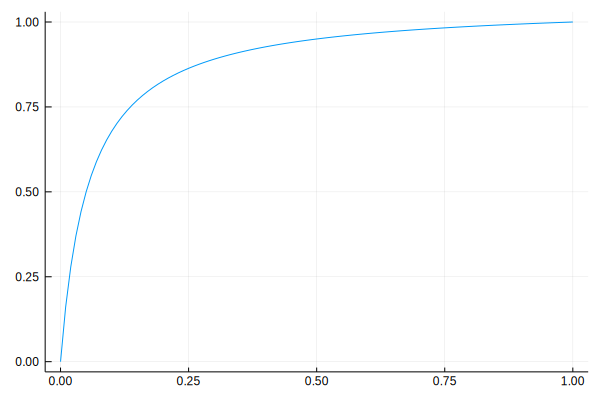

In [2]:
plot(0:0.01:1, prior -> (0.95 * prior) / (0.95 * prior + 0.05 * (1-prior)), legend=false)

# Exercise 2.4

An urn contains $K$ balls, $B$ are black, and $W$ are white. $N$ balls are drawn from the urn, with replacement.

What is the probability distribution of the number of times a black ball is drawn, $n_B$?

What is the expectation of $n_B$?

What is the variance of $n_B$?

What is the standard deviation of $n_B$?

The probability distribution is a binomial distribution.

The expectation is $N \times \frac{B}{K}$.

The variance is $NP(1-P)$ where $P = \frac{B}{K}$.

The standard deviation is $\sqrt{NP(1-P)}$.

The expectation is:         1.000
The variance is:            0.800
The standard deviation is:  0.894


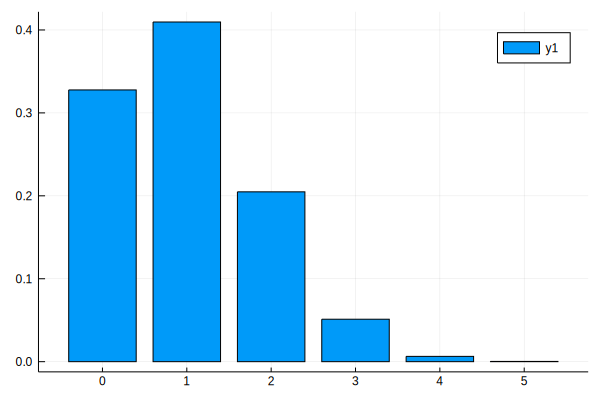

In [3]:
function exercise_2_4(k, b, n)
    @assert k >= b
    p = b / k
    variance = n * p * (1-p)
    @printf("The expectation is:        %6.3f\n", n * p)
    @printf("The variance is:           %6.3f\n", variance)
    @printf("The standard deviation is: %6.3f\n", sqrt(variance))
    bar(0:n, n′ -> pdf(Binomial(n, p), n′))
end

exercise_2_4(10, 2, 5)

# Example 2.6

You have 11 urns labeled by $u \in {0, 1, 2, ..., 9, 10}$. Each urn has $u$ black balls, and $10 - u$ white balls.

You draw 10 balls, with replacement, and 3 of the 10 draws are black balls. What is the probability that the balls are being drawn from each of the 11 urns?

We will need Bayes' theorem again:

$$P(u|n_B) = \frac{ P(n_B|u) P(u) }{ \sum_{u'} P(n_B|u') P(u') }$$

We know:

$$
\textrm{binomial}(k|n,f) = {n \choose k} \ f^k \ (1-f)^{n-k}
\\
P(n_B|u) = \textrm{binomial}(n_B|10, \frac{u}{10})
\\
P(u) = \frac{1}{11}
$$

We will calculate $P(n_B|u)$ for all $u$, and compare their relative values. This will give us the probability for each urn.

 0: 0.000
 1: 0.063
 2: 0.221
 3: 0.293
 4: 0.236
 5: 0.129
 6: 0.047
 7: 0.010
 8: 0.001
 9: 0.000
10: 0.000
Probability that the next ball drawn is black: 0.333


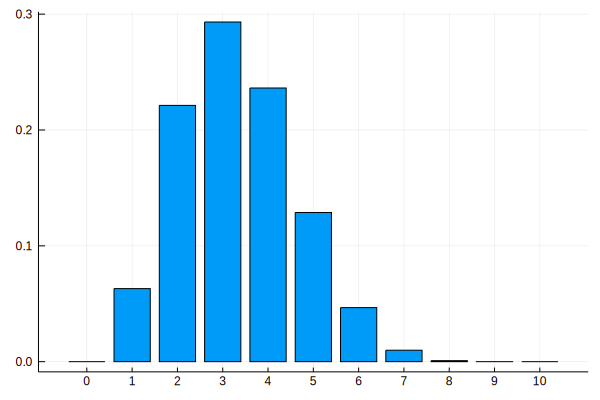

In [4]:
function example_2_6_urn_probabilities(N, nB)
    likelihoods = [pdf(Binomial(N, u / 10), nB) for u in 0:10]
    ps = likelihoods / sum(likelihoods)
    @assert abs(sum(ps) - 1) < 1e-8
    ps
end

function example_2_6(N, nB)
    ps = example_2_6_urn_probabilities(N, nB)
    p_next_black = sum(zip(0:10, ps)) do (u, p)
        (u / 10) * p
    end
    for u in 1:length(ps)
        @printf("%2s: %.3f\n", u-1, ps[u])
    end
    @printf("Probability that the next ball drawn is black: %.3f\n", p_next_black)
    bar(0:10, ps, xticks=0:10, legend=false)
end

example_2_6(10, 3)

# Forward probabilities and inverse probabilities

Forward probability: Predict the outcome of a generative model based on the details of that model.

Inverse probability: Predict the details of a generative model based on the outcome of that model.